In [1]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = load_breast_cancer()
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
X_features = dataset.data
y_label = dataset.target

In [5]:
feature_names = dataset.feature_names
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
cancer_df = pd.DataFrame(data=X_features)
cancer_df.columns = feature_names
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
cancer_df['target'] = y_label

In [10]:
cancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [11]:
cancer_df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label,
                                                   test_size=0.2, random_state=156 )

In [14]:
from xgboost import XGBClassifier

In [15]:
# XGBClassifier() : XGBoost 객체를 생성해서 리턴
# n_estimators = 10 : XGBoost 구성하는 트리 개수 10개

xgboost = XGBClassifier(n_estimators = 10)
xgboost

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=False, verbosity=None)

In [16]:
xgboost.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='error')

[0]	validation_0-error:0.06140
[1]	validation_0-error:0.06140
[2]	validation_0-error:0.06140
[3]	validation_0-error:0.06140
[4]	validation_0-error:0.06140
[5]	validation_0-error:0.06140
[6]	validation_0-error:0.05263
[7]	validation_0-error:0.05263
[8]	validation_0-error:0.05263
[9]	validation_0-error:0.05263


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [17]:
pred = xgboost.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [19]:
confusion_matrix(y_test, pred)

array([[33,  4],
       [ 2, 75]], dtype=int64)

In [20]:
accuracy_score(y_test, pred)

0.9473684210526315

In [21]:
precision_score(y_test,pred)

0.9493670886075949

In [22]:
recall_score(y_test, pred)

0.974025974025974

In [23]:
f1_score(y_test, pred)

0.9615384615384615

In [24]:
roc_auc_score(y_test, pred)

0.932958932958933

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
xgb_clf = XGBClassifier(n_estimators=100)
xgb_clf

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=False, verbosity=None)

In [27]:
params = {'max_depth': [5, 7 ,9],
         'min_child_weight': [1, 3, 5, 7],
         'colsample_bytree': [0.1, 0.3, 0.5, 0.75, 1.0],
         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]}

In [28]:
gridcv = GridSearchCV(xgb_clf, param_grid=params)
gridcv

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_con...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid='warn', n_jobs=None,
             para

In [29]:
gridcv.fit(X_train,
          y_train,
           eval_set=[(X_test, y_test)],
           eval_metric="error")

[0]	validation_0-error:0.07895
[1]	validation_0-error:0.07895
[2]	validation_0-error:0.06140
[3]	validation_0-error:0.05263
[4]	validation_0-error:0.07895
[5]	validation_0-error:0.07895
[6]	validation_0-error:0.08772
[7]	validation_0-error:0.07018
[8]	validation_0-error:0.09649
[9]	validation_0-error:0.09649
[10]	validation_0-error:0.07895
[11]	validation_0-error:0.08772
[12]	validation_0-error:0.08772
[13]	validation_0-error:0.07895
[14]	validation_0-error:0.07895
[15]	validation_0-error:0.07895
[16]	validation_0-error:0.08772
[17]	validation_0-error:0.08772
[18]	validation_0-error:0.08772
[19]	validation_0-error:0.07895
[20]	validation_0-error:0.08772
[21]	validation_0-error:0.07895
[22]	validation_0-error:0.08772
[23]	validation_0-error:0.08772
[24]	validation_0-error:0.08772
[25]	validation_0-error:0.07895
[26]	validation_0-error:0.07018
[27]	validation_0-error:0.07018
[28]	validation_0-error:0.07895
[29]	validation_0-error:0.06140
[30]	validation_0-error:0.07018
[31]	validation_0-

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[98]	validation_0-error:0.05263
[99]	validation_0-error:0.05263
[0]	validation_0-error:0.09649
[1]	validation_0-error:0.07018
[2]	validation_0-error:0.07018
[3]	validation_0-error:0.07018
[4]	validation_0-error:0.07018
[5]	validation_0-error:0.06140
[6]	validation_0-error:0.06140
[7]	validation_0-error:0.07018
[8]	validation_0-error:0.07018
[9]	validation_0-error:0.07895
[10]	validation_0-error:0.07895
[11]	validation_0-error:0.07895
[12]	validation_0-error:0.07895
[13]	validation_0-error:0.07895
[14]	validation_0-error:0.07895
[15]	validation_0-error:0.07895
[16]	validation_0-error:0.07018
[17]	validation_0-error:0.07895
[18]	validation_0-error:0.07018
[19]	validation_0-error:0.07018
[20]	validation_0-error:0.07018
[21]	validation_0-error:0.07018
[22]	validation_0-error:0.07018
[23]	validation_0-error:0.07018
[24]	validation_0-error:0.07018
[25]	validation_0-error:0.07018
[26]	validation_0-error:0.07018
[27]	validation_0-error:0.07018
[28]	validation_0-error:0.07018
[29]	validation_0-

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[22]	validation_0-error:0.07895
[23]	validation_0-error:0.07895
[24]	validation_0-error:0.07895
[25]	validation_0-error:0.07895
[26]	validation_0-error:0.07895
[27]	validation_0-error:0.07895
[28]	validation_0-error:0.07895
[29]	validation_0-error:0.07895
[30]	validation_0-error:0.07895
[31]	validation_0-error:0.07895
[32]	validation_0-error:0.07895
[33]	validation_0-error:0.07895
[34]	validation_0-error:0.07895
[35]	validation_0-error:0.07895
[36]	validation_0-error:0.07895
[37]	validation_0-error:0.07895
[38]	validation_0-error:0.07895
[39]	validation_0-error:0.07895
[40]	validation_0-error:0.07895
[41]	validation_0-error:0.07895
[42]	validation_0-error:0.07895
[43]	validation_0-error:0.07895
[44]	validation_0-error:0.07895
[45]	validation_0-error:0.07895
[46]	validation_0-error:0.07895
[47]	validation_0-error:0.07895
[48]	validation_0-error:0.07895
[49]	validation_0-error:0.07895
[50]	validation_0-error:0.07895
[51]	validation_0-error:0.07895
[52]	validation_0-error:0.07895
[53]	val

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[29]	validation_0-error:0.08772
[30]	validation_0-error:0.08772
[31]	validation_0-error:0.08772
[32]	validation_0-error:0.08772
[33]	validation_0-error:0.08772
[34]	validation_0-error:0.08772
[35]	validation_0-error:0.08772
[36]	validation_0-error:0.08772
[37]	validation_0-error:0.08772
[38]	validation_0-error:0.08772
[39]	validation_0-error:0.08772
[40]	validation_0-error:0.08772
[41]	validation_0-error:0.08772
[42]	validation_0-error:0.08772
[43]	validation_0-error:0.08772
[44]	validation_0-error:0.08772
[45]	validation_0-error:0.08772
[46]	validation_0-error:0.08772
[47]	validation_0-error:0.08772
[48]	validation_0-error:0.08772
[49]	validation_0-error:0.08772
[50]	validation_0-error:0.08772
[51]	validation_0-error:0.08772
[52]	validation_0-error:0.08772
[53]	validation_0-error:0.08772
[54]	validation_0-error:0.08772
[55]	validation_0-error:0.08772
[56]	validation_0-error:0.08772
[57]	validation_0-error:0.08772
[58]	validation_0-error:0.08772
[59]	validation_0-error:0.08772
[60]	val

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[71]	validation_0-error:0.04386
[72]	validation_0-error:0.04386
[73]	validation_0-error:0.04386
[74]	validation_0-error:0.04386
[75]	validation_0-error:0.04386
[76]	validation_0-error:0.04386
[77]	validation_0-error:0.04386
[78]	validation_0-error:0.04386
[79]	validation_0-error:0.04386
[80]	validation_0-error:0.04386
[81]	validation_0-error:0.04386
[82]	validation_0-error:0.04386
[83]	validation_0-error:0.04386
[84]	validation_0-error:0.04386
[85]	validation_0-error:0.04386
[86]	validation_0-error:0.04386
[87]	validation_0-error:0.04386
[88]	validation_0-error:0.04386
[89]	validation_0-error:0.04386
[90]	validation_0-error:0.04386
[91]	validation_0-error:0.04386
[92]	validation_0-error:0.04386
[93]	validation_0-error:0.04386
[94]	validation_0-error:0.04386
[95]	validation_0-error:0.04386
[96]	validation_0-error:0.04386
[97]	validation_0-error:0.04386
[98]	validation_0-error:0.04386
[99]	validation_0-error:0.04386
[0]	validation_0-error:0.07895
[1]	validation_0-error:0.07895
[2]	valida

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [30]:
gridcv.best_params_

{'colsample_bytree': 0.1,
 'learning_rate': 0.2,
 'max_depth': 5,
 'min_child_weight': 3}

In [31]:
pred = gridcv.predict(X_test)
pred

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1])

In [32]:
confusion_matrix(y_test, pred)

array([[32,  5],
       [ 2, 75]], dtype=int64)

In [33]:
accuracy_score(y_test, pred)

0.9385964912280702

In [34]:
precision_score(y_test, pred)

0.9375

In [35]:
recall_score(y_test, pred)

0.974025974025974

In [36]:
gridcv.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [37]:
ftr_importances_values = gridcv.best_estimator_.feature_importances_
ftr_importances_values

array([0.0954494 , 0.0165991 , 0.01195115, 0.2901986 , 0.00733698,
       0.01574708, 0.04890491, 0.03852955, 0.00436653, 0.01059272,
       0.0059286 , 0.00560562, 0.03263143, 0.01997124, 0.01323937,
       0.00433868, 0.0168711 , 0.00416985, 0.00549076, 0.00824457,
       0.02900732, 0.01169968, 0.08427037, 0.06494008, 0.01098481,
       0.00648135, 0.01122354, 0.06828628, 0.01397292, 0.04296637],
      dtype=float32)

In [38]:
ftr_importances = pd.Series(ftr_importances_values,index = feature_names)
ftr_importances

mean radius                0.095449
mean texture               0.016599
mean perimeter             0.011951
mean area                  0.290199
mean smoothness            0.007337
mean compactness           0.015747
mean concavity             0.048905
mean concave points        0.038530
mean symmetry              0.004367
mean fractal dimension     0.010593
radius error               0.005929
texture error              0.005606
perimeter error            0.032631
area error                 0.019971
smoothness error           0.013239
compactness error          0.004339
concavity error            0.016871
concave points error       0.004170
symmetry error             0.005491
fractal dimension error    0.008245
worst radius               0.029007
worst texture              0.011700
worst perimeter            0.084270
worst area                 0.064940
worst smoothness           0.010985
worst compactness          0.006481
worst concavity            0.011224
worst concave points       0

In [42]:
ftr_importances = ftr_importances.sort_values(ascending=False)
ftr_importances

mean area                  0.290199
mean radius                0.095449
worst perimeter            0.084270
worst concave points       0.068286
worst area                 0.064940
mean concavity             0.048905
worst fractal dimension    0.042966
mean concave points        0.038530
perimeter error            0.032631
worst radius               0.029007
area error                 0.019971
concavity error            0.016871
mean texture               0.016599
mean compactness           0.015747
worst symmetry             0.013973
smoothness error           0.013239
mean perimeter             0.011951
worst texture              0.011700
worst concavity            0.011224
worst smoothness           0.010985
mean fractal dimension     0.010593
fractal dimension error    0.008245
mean smoothness            0.007337
worst compactness          0.006481
radius error               0.005929
texture error              0.005606
symmetry error             0.005491
mean symmetry              0

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

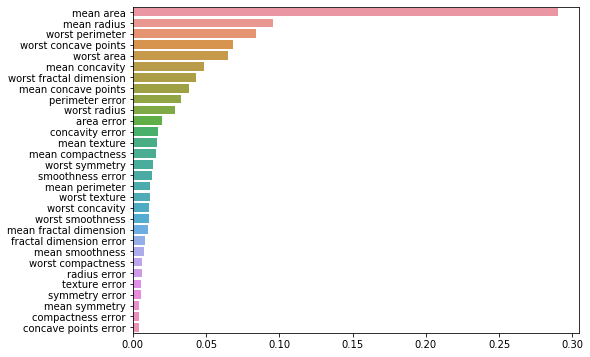

In [44]:
plt.figure(figsize=(8,6))
sns.barplot(x=ftr_importances, y=ftr_importances.index)
plt.show()